/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


,diff
count,528.000000
mean,199.664773
std,252.168619
min,2.000000
25%,27.000000
50%,79.000000
75%,296.500000
max,1356.000000


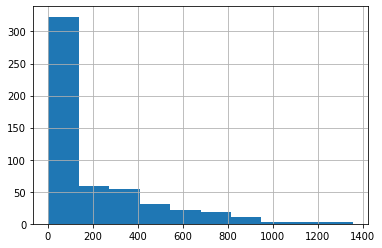

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

#Analysis of Death Cases 

df = pd.read_csv('/Users/lilimatic/stopah.csv')

#treat values as NA
for x in df.columns:
        if len(df[df[x] == -2147483648].index) >0:
            ix = df[df[x] == -2147483648].index
            imp = df[[x]].loc[~df.index.isin(ix)].mean()[0]
            df.loc[ix,x] = np.nan
            
date_format = "%d/%m/%Y"

df['Initial.Admission.date'] = pd.to_datetime(df['Initial.Admission.date'], format='%d-%b-%y')
df['Date_of_death']          = pd.to_datetime(df['Date_of_death'], format='%d/%m/%y')
df['diff']                   = df['Date_of_death'] - df['Initial.Admission.date']
df['diff']                   = df['diff'].dt.days

df['diff'].hist()
df[['diff']].describe()

In [22]:
#All gender types
df['Gender'].unique()

#Number of male 
print('Male n='+str(len(df[['Gender']][df['Gender']==0])) + ' and percentage (%):' +str(round(len(df[['Gender']][df['Gender']==0])*100/len(df),2)))

print('Female n='+str(len(df[['Gender']][df['Gender']==1])) + ' and percentage (%):' +str(round(len(df[['Gender']][df['Gender']==1])*100/len(df),2)))



Male n=668 and percentage (%):62.55
Female n=400 and percentage (%):37.45
